# Personalized Health & Fitness Assistant

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('personalized_health_fitness_dataset.csv') 
df

User_ID      Height     Weight  Age  Gender  Body_Fat_Percentage  \
0          1  158.415593  69.086772   39   Other            14.424875   
1          2  178.398659  68.931819   26    Male            23.531503   
2          3  157.924292  68.205912   50   Other            16.537440   
3          4  163.168218  81.043731   44  Female            16.816315   
4          5  173.671615  67.499008   45    Male            13.243259   
..       ...         ...        ...  ...     ...                  ...   
995      996  179.164411  84.931200   47   Other            11.140609   
996      997  169.216658  54.526712   60  Female            26.841698   
997      998  176.564982  77.635102   35    Male            23.645311   
998      999  166.743366  63.685124   19   Other            21.831660   
999     1000  173.470671  67.183918   37  Female            21.225174   

     Sugar_Levels  Cholesterol  Steps_Taken  Calories_Burned  ...  \
0       81.862900   205.713814        12859             2098  ...   
1       91.577845   223.787537         9275             3747  ...   
2       77.877321   182.670359         9985             1896  ...   
3       88.336440   224.845036        13208             2800  ...   
4       81.138211   197.862419        13336             2407  ...   
..            ...          ...          ...              ...  ...   
995    106.585646   202.091896         2008             1896  ...   
996     84.528570   188.686545        10210             2972  ...   
997    108.040137   223.456991        13756             1314  ...   
998     88.773675   193.045688         3161             1749  ...   
999     98.832614   210.710912        13307             2719  ...   

    Protein_Intake  Water_Intake  Sleep_Duration  Medical_Conditions  \
0        77.307211   1725.659483        7.437296        Hypertension   
1        67.714415   2267.197073        8.736299        Hypertension   
2        85.348865   2148.402759        4.457952             Obesity   
3        75.428546   1504.750413        6.391025             Obesity   
4        75.147535   1752.198397        9.116879              Asthma   
..             ...           ...             ...                 ...   
995     110.295394   2519.480813        6.996148            Diabetes   
996      87.954799   2749.698472        6.295955        Hypertension   
997      98.082859   2511.380607        5.372109                None   
998     141.378710   2180.141747        5.769469                None   
999     117.190555   2349.813910        7.302471             Obesity   

     Stress_Levels     Smoking_Status Alcohol_Consumption Sedentary_Behavior  \
0             High      Former smoker               Heavy                  5   
1         Moderate  Occasional smoker            Moderate                  2   
2         Moderate     Regular smoker            Moderate                  6   
3             High      Former smoker                None                  3   
4             High     Regular smoker            Moderate                  9   
..             ...                ...                 ...                ...   
995            Low      Former smoker            Moderate                  7   
996            Low         Non-smoker            Moderate                  5   
997       Moderate      Former smoker          Occasional                  5   
998       Moderate         Non-smoker               Heavy                  9   
999            Low         Non-smoker               Heavy                  7   

         Health_Goals Exercise_Preferences  
0        Better sleep              Running  
1        Better sleep             Swimming  
2     General fitness              Walking  
3        Better sleep              Walking  
4    Stress reduction              Walking  
..                ...                  ...  
995   General fitness              Walking  
996   General fitness                 Yoga  
997  Stress reduction                 Yoga  
998       Weight loss  

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(1000, 23)

In [5]:
df.head()

User_ID      Height     Weight  Age  Gender  Body_Fat_Percentage  \
0        1  158.415593  69.086772   39   Other            14.424875   
1        2  178.398659  68.931819   26    Male            23.531503   
2        3  157.924292  68.205912   50   Other            16.537440   
3        4  163.168218  81.043731   44  Female            16.816315   
4        5  173.671615  67.499008   45    Male            13.243259   

   Sugar_Levels  Cholesterol  Steps_Taken  Calories_Burned  ...  \
0     81.862900   205.713814        12859             2098  ...   
1     91.577845   223.787537         9275             3747  ...   
2     77.877321   182.670359         9985             1896  ...   
3     88.336440   224.845036        13208             2800  ...   
4     81.138211   197.862419        13336             2407  ...   

  Protein_Intake  Water_Intake  Sleep_Duration  Medical_Conditions  \
0      77.307211   1725.659483        7.437296        Hypertension   
1      67.714415   2267.197073        8.736299        Hypertension   
2      85.348865   2148.402759        4.457952             Obesity   
3      75.428546   1504.750413        6.391025             Obesity   
4      75.147535   1752.198397        9.116879              Asthma   

   Stress_Levels     Smoking_Status Alcohol_Consumption Sedentary_Behavior  \
0           High      Former smoker               Heavy                  5   
1       Moderate  Occasional smoker            Moderate                  2   
2       Moderate     Regular smoker            Moderate                  6   
3           High      Former smoker                None                  3   
4           High     Regular smoker            Moderate                  9   

       Health_Goals Exercise_Preferences  
0      Better sleep              Running  
1      Better sleep             Swimming  
2   General fitness              Walking  
3      Better sleep              Walking  
4  Stress reduction              Walking  

[5 rows x 23 columns]

In [6]:
df.sample(10)

User_ID      Height     Weight  Age  Gender  Body_Fat_Percentage  \
207      208  175.368009  57.610600   72    Male            18.730985   
25        26  174.392632  65.760200   56    Male            14.223736   
220      221  175.393576  67.958942   39  Female            19.217431   
808      809  171.000244  69.201116   43  Female            24.771373   
801      802  163.119674  61.164513   18  Female            26.944991   
736      737  169.117784  61.679212   22    Male            11.959197   
616      617  171.247165  87.416956   28   Other            25.705573   
852      853  168.188292  58.719794   53   Other            28.653181   
557      558  168.842999  70.916277   64  Female            12.585374   
33        34  173.491074  46.520789   57    Male            18.992864   

     Sugar_Levels  Cholesterol  Steps_Taken  Calories_Burned  ...  \
207    103.666681   194.459745         9977             3321  ...   
25      70.413952   221.419614        14183             1895  ...   
220    112.857939   225.072787        12048             2727  ...   
808     92.943698   201.444234        12838             2996  ...   
801     86.569684   230.660620         8716             3112  ...   
736     93.350791   171.692445        13358             1325  ...   
616     70.141135   214.113931        14560             3198  ...   
852     85.801493   186.420767         9355             3174  ...   
557     84.477860   218.664447         3145             3629  ...   
33      67.979206   184.014107         2900             1954  ...   

    Protein_Intake  Water_Intake  Sleep_Duration  Medical_Conditions  \
207      89.608994   2721.987913        4.169748              Asthma   
25      113.783915   2029.343119       10.084369             Obesity   
220     103.836896   2124.571344        7.559609              Asthma   
808     107.026131   2367.961018        6.050633                None   
801      88.190261   2386.502860        8.011663              Asthma   
736      97.470999   1702.534415        6.952416        Hypertension   
616     101.756220   2218.916150        9.054444            Diabetes   
852      80.825654    833.535734        7.343320            Diabetes   
557      71.514179   2340.055810        6.802576             Obesity   
33       91.106570   1803.766283        4.985875                None   

     Stress_Levels     Smoking_Status Alcohol_Consumption Sedentary_Behavior  \
207       Moderate  Occasional smoker            Moderate                  3   
25        Moderate  Occasional smoker               Heavy                  3   
220           High  Occasional smoker            Moderate                  5   
808            Low  Occasional smoker            Moderate                  9   
801           High  Occasional smoker            Moderate                  2   
736           High      Former smoker          Occasional                  4   
616           High      Former smoker               Heavy                  7   
852       Moderate      Former smoker                None                  6   
557           High     Regular smoker                None                  7   
33        Moderate  Occasional smoker          Occasional                  9   

         Health_Goals Exercise_Preferences  
207   General fitness              Running  
25        Muscle gain              Walking  
220   General fitness              Cycling  
808       Weight loss              Running  
801       Weight loss              Walking  
736   General fitness              Cycling  
616       Muscle gain                 Yoga  
852      Better sleep              Cycling  
557       Weight loss             Swimming  
33   Stress reduction              Walking  

[10 rows x 23 columns]

In [7]:
df.tail()

User_ID      Height     Weight  Age  Gender  Body_Fat_Percentage  \
995      996  179.164411  84.931200   47   Other            11.140609   
996      997  169.216658  54.526712   60  Female            26.841698   
997      998  176.564982  77.635102   35    Male            23.645311   
998      999  166.743366  63.685124   19   Other            21.831660   
999     1000  173.470671  67.183918   37  Female            21.225174   

     Sugar_Levels  Cholesterol  Steps_Taken  Calories_Burned  ...  \
995    106.585646   202.091896         2008             1896  ...   
996     84.528570   188.686545        10210             2972  ...   
997    108.040137   223.456991        13756             1314  ...   
998     88.773675   193.045688         3161             1749  ...   
999     98.832614   210.710912        13307             2719  ...   

    Protein_Intake  Water_Intake  Sleep_Duration  Medical_Conditions  \
995     110.295394   2519.480813        6.996148            Diabetes   
996      87.954799   2749.698472        6.295955        Hypertension   
997      98.082859   2511.380607        5.372109                None   
998     141.378710   2180.141747        5.769469                None   
999     117.190555   2349.813910        7.302471             Obesity   

     Stress_Levels  Smoking_Status Alcohol_Consumption Sedentary_Behavior  \
995            Low   Former smoker            Moderate                  7   
996            Low      Non-smoker            Moderate                  5   
997       Moderate   Former smoker          Occasional                  5   
998       Moderate      Non-smoker               Heavy                  9   
999            Low      Non-smoker               Heavy                  7   

         Health_Goals Exercise_Preferences  
995   General fitness              Walking  
996   General fitness                 Yoga  
997  Stress reduction                 Yoga  
998       Weight loss              Cycling  
999   General fitness              Walking  

[5 rows x 23 columns]

In [8]:
df.describe()

User_ID       Height       Weight          Age  \
count  1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000   169.967473    69.991636    48.454000   
std     288.819436    10.000244    10.426424    18.047315   
min       1.000000   140.119922    30.528202    18.000000   
25%     250.750000   162.968814    63.348499    32.000000   
50%     500.500000   169.945208    69.822155    49.000000   
75%     750.250000   176.863196    76.980673    64.000000   
max    1000.000000   199.956324   103.406539    79.000000   

       Body_Fat_Percentage  Sugar_Levels  Cholesterol   Steps_Taken  \
count          1000.000000   1000.000000  1000.000000   1000.000000   
mean             19.974164     89.434417   198.982837   8536.586000   
std               5.866158      9.592398    20.138950   3798.506736   
min              10.001476     60.246368   135.045641   2007.000000   
25%              14.870433     82.470502   186.155572   5236.500000   
50%              19.818120     89.454212   199.323946   8445.500000   
75%              25.165955     96.005152   212.900835  11999.750000   
max              29.983207    119.067532   286.435166  14960.000000   

       Calories_Burned  Active_Minutes  Carbohydrate_Intake  Protein_Intake  \
count      1000.000000     1000.000000          1000.000000     1000.000000   
mean       2507.143000      102.344000           252.368392      100.593378   
std         869.415603       42.360549            49.409850       20.751280   
min        1002.000000       30.000000           101.354756       39.788759   
25%        1770.750000       65.000000           218.195432       86.081606   
50%        2500.500000      101.000000           252.527645      100.349739   
75%        3257.500000      139.000000           285.604036      115.543722   
max        3993.000000      179.000000           393.558853      188.977063   

       Water_Intake  Sleep_Duration  Sedentary_Behavior  
count   1000.000000     1000.000000         1000.000000  
mean    2012.558508        7.013530            5.467000  
std      500.190187        0.989237            2.281253  
min      440.577141        4.081164            2.000000  
25%     1687.180576        6.353437            3.000000  
50%     2034.572354        7.008154            6.000000  
75%     2359.336882        7.668168            7.000000  
max     3434.070807       11.132548            9.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   User_ID               1000 non-null   int64  
 1   Height                1000 non-null   float64
 2   Weight                1000 non-null   float64
 3   Age                   1000 non-null   int64  
 4   Gender                1000 non-null   object 
 5   Body_Fat_Percentage   1000 non-null   float64
 6   Sugar_Levels          1000 non-null   float64
 7   Cholesterol           1000 non-null   float64
 8   Steps_Taken           1000 non-null   int64  
 9   Calories_Burned       1000 non-null   int64  
 10  Exercise_Intensity    1000 non-null   object 
 11  Active_Minutes        1000 non-null   int64  
 12  Carbohydrate_Intake   1000 non-null   float64
 13  Protein_Intake        1000 non-null   float64
 14  Water_Intake          1000 non-null   float64
 15  Sleep_Duration        

In [10]:
print(df.columns)

Index(['User_ID', 'Height', 'Weight', 'Age', 'Gender', 'Body_Fat_Percentage',
       'Sugar_Levels', 'Cholesterol', 'Steps_Taken', 'Calories_Burned',
       'Exercise_Intensity', 'Active_Minutes', 'Carbohydrate_Intake',
       'Protein_Intake', 'Water_Intake', 'Sleep_Duration',
       'Medical_Conditions', 'Stress_Levels', 'Smoking_Status',
       'Alcohol_Consumption', 'Sedentary_Behavior', 'Health_Goals',
       'Exercise_Preferences'],
      dtype='object')


In [11]:
print(df.isnull().sum())

User_ID                 0
Height                  0
Weight                  0
Age                     0
Gender                  0
Body_Fat_Percentage     0
Sugar_Levels            0
Cholesterol             0
Steps_Taken             0
Calories_Burned         0
Exercise_Intensity      0
Active_Minutes          0
Carbohydrate_Intake     0
Protein_Intake          0
Water_Intake            0
Sleep_Duration          0
Medical_Conditions      0
Stress_Levels           0
Smoking_Status          0
Alcohol_Consumption     0
Sedentary_Behavior      0
Health_Goals            0
Exercise_Preferences    0
dtype: int64


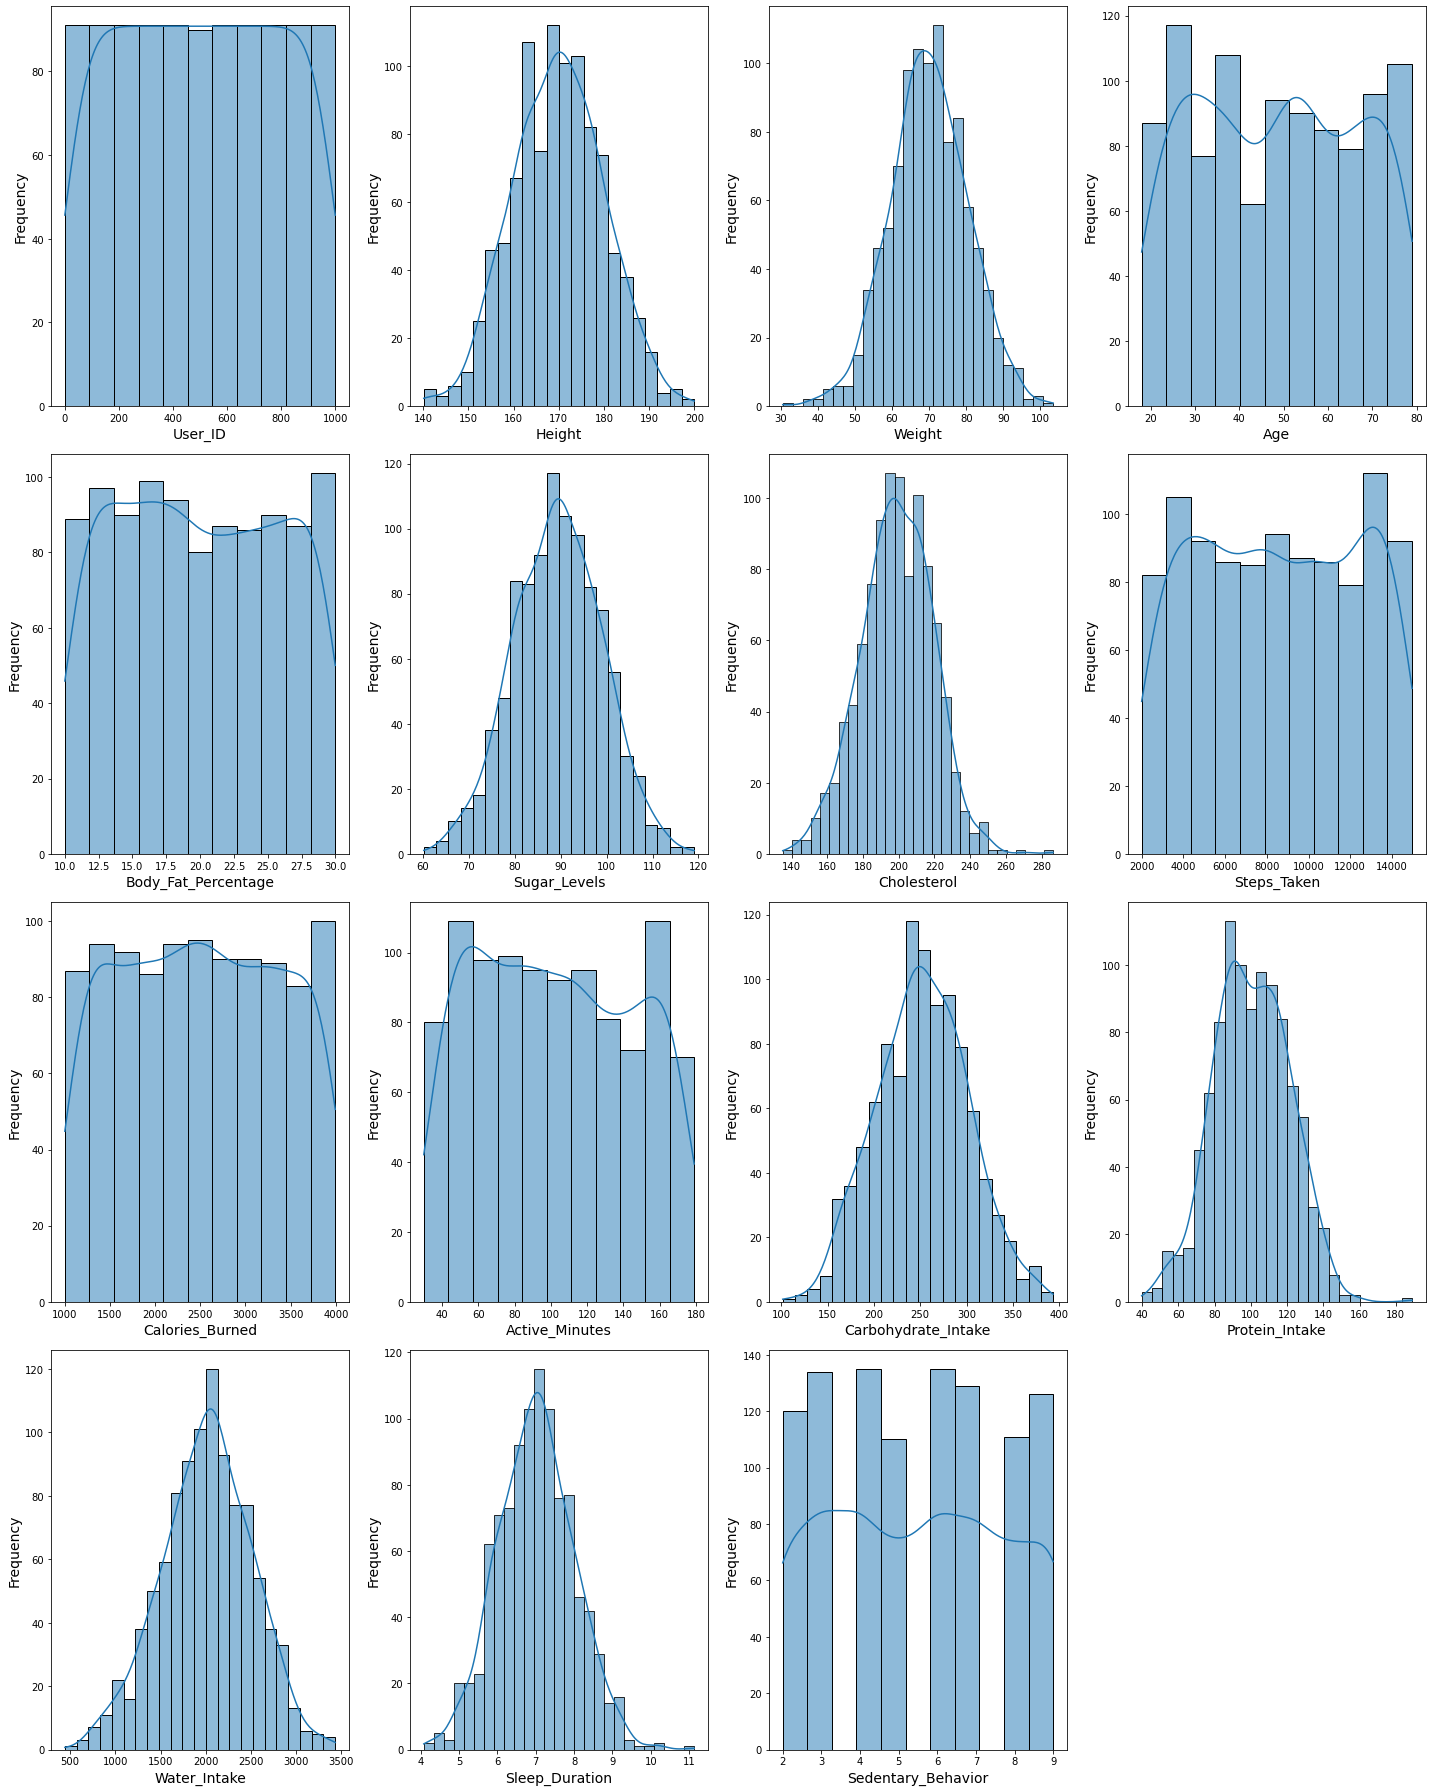

In [12]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

rows = 4
cols = 4
total_plots = rows * cols

plt.figure(figsize=(20, 25))

for i, column in enumerate(numeric_columns[:total_plots], 1):
    ax = plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True, ax=ax)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

plt.tight_layout()
plt.show()

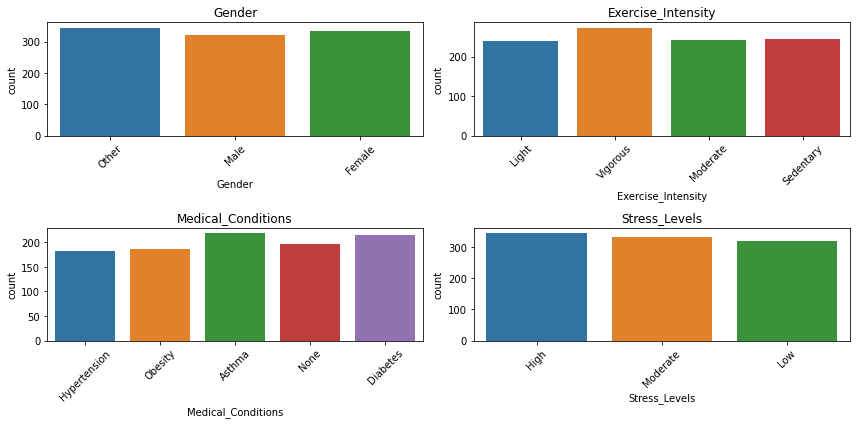

In [13]:
plt.figure(figsize=(12, 6))
num_plots = min(len(df.select_dtypes(include=['object']).columns), 4)  # Maximum of 4 plots
for i, col in enumerate(df.select_dtypes(include=['object']).columns[:num_plots], 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

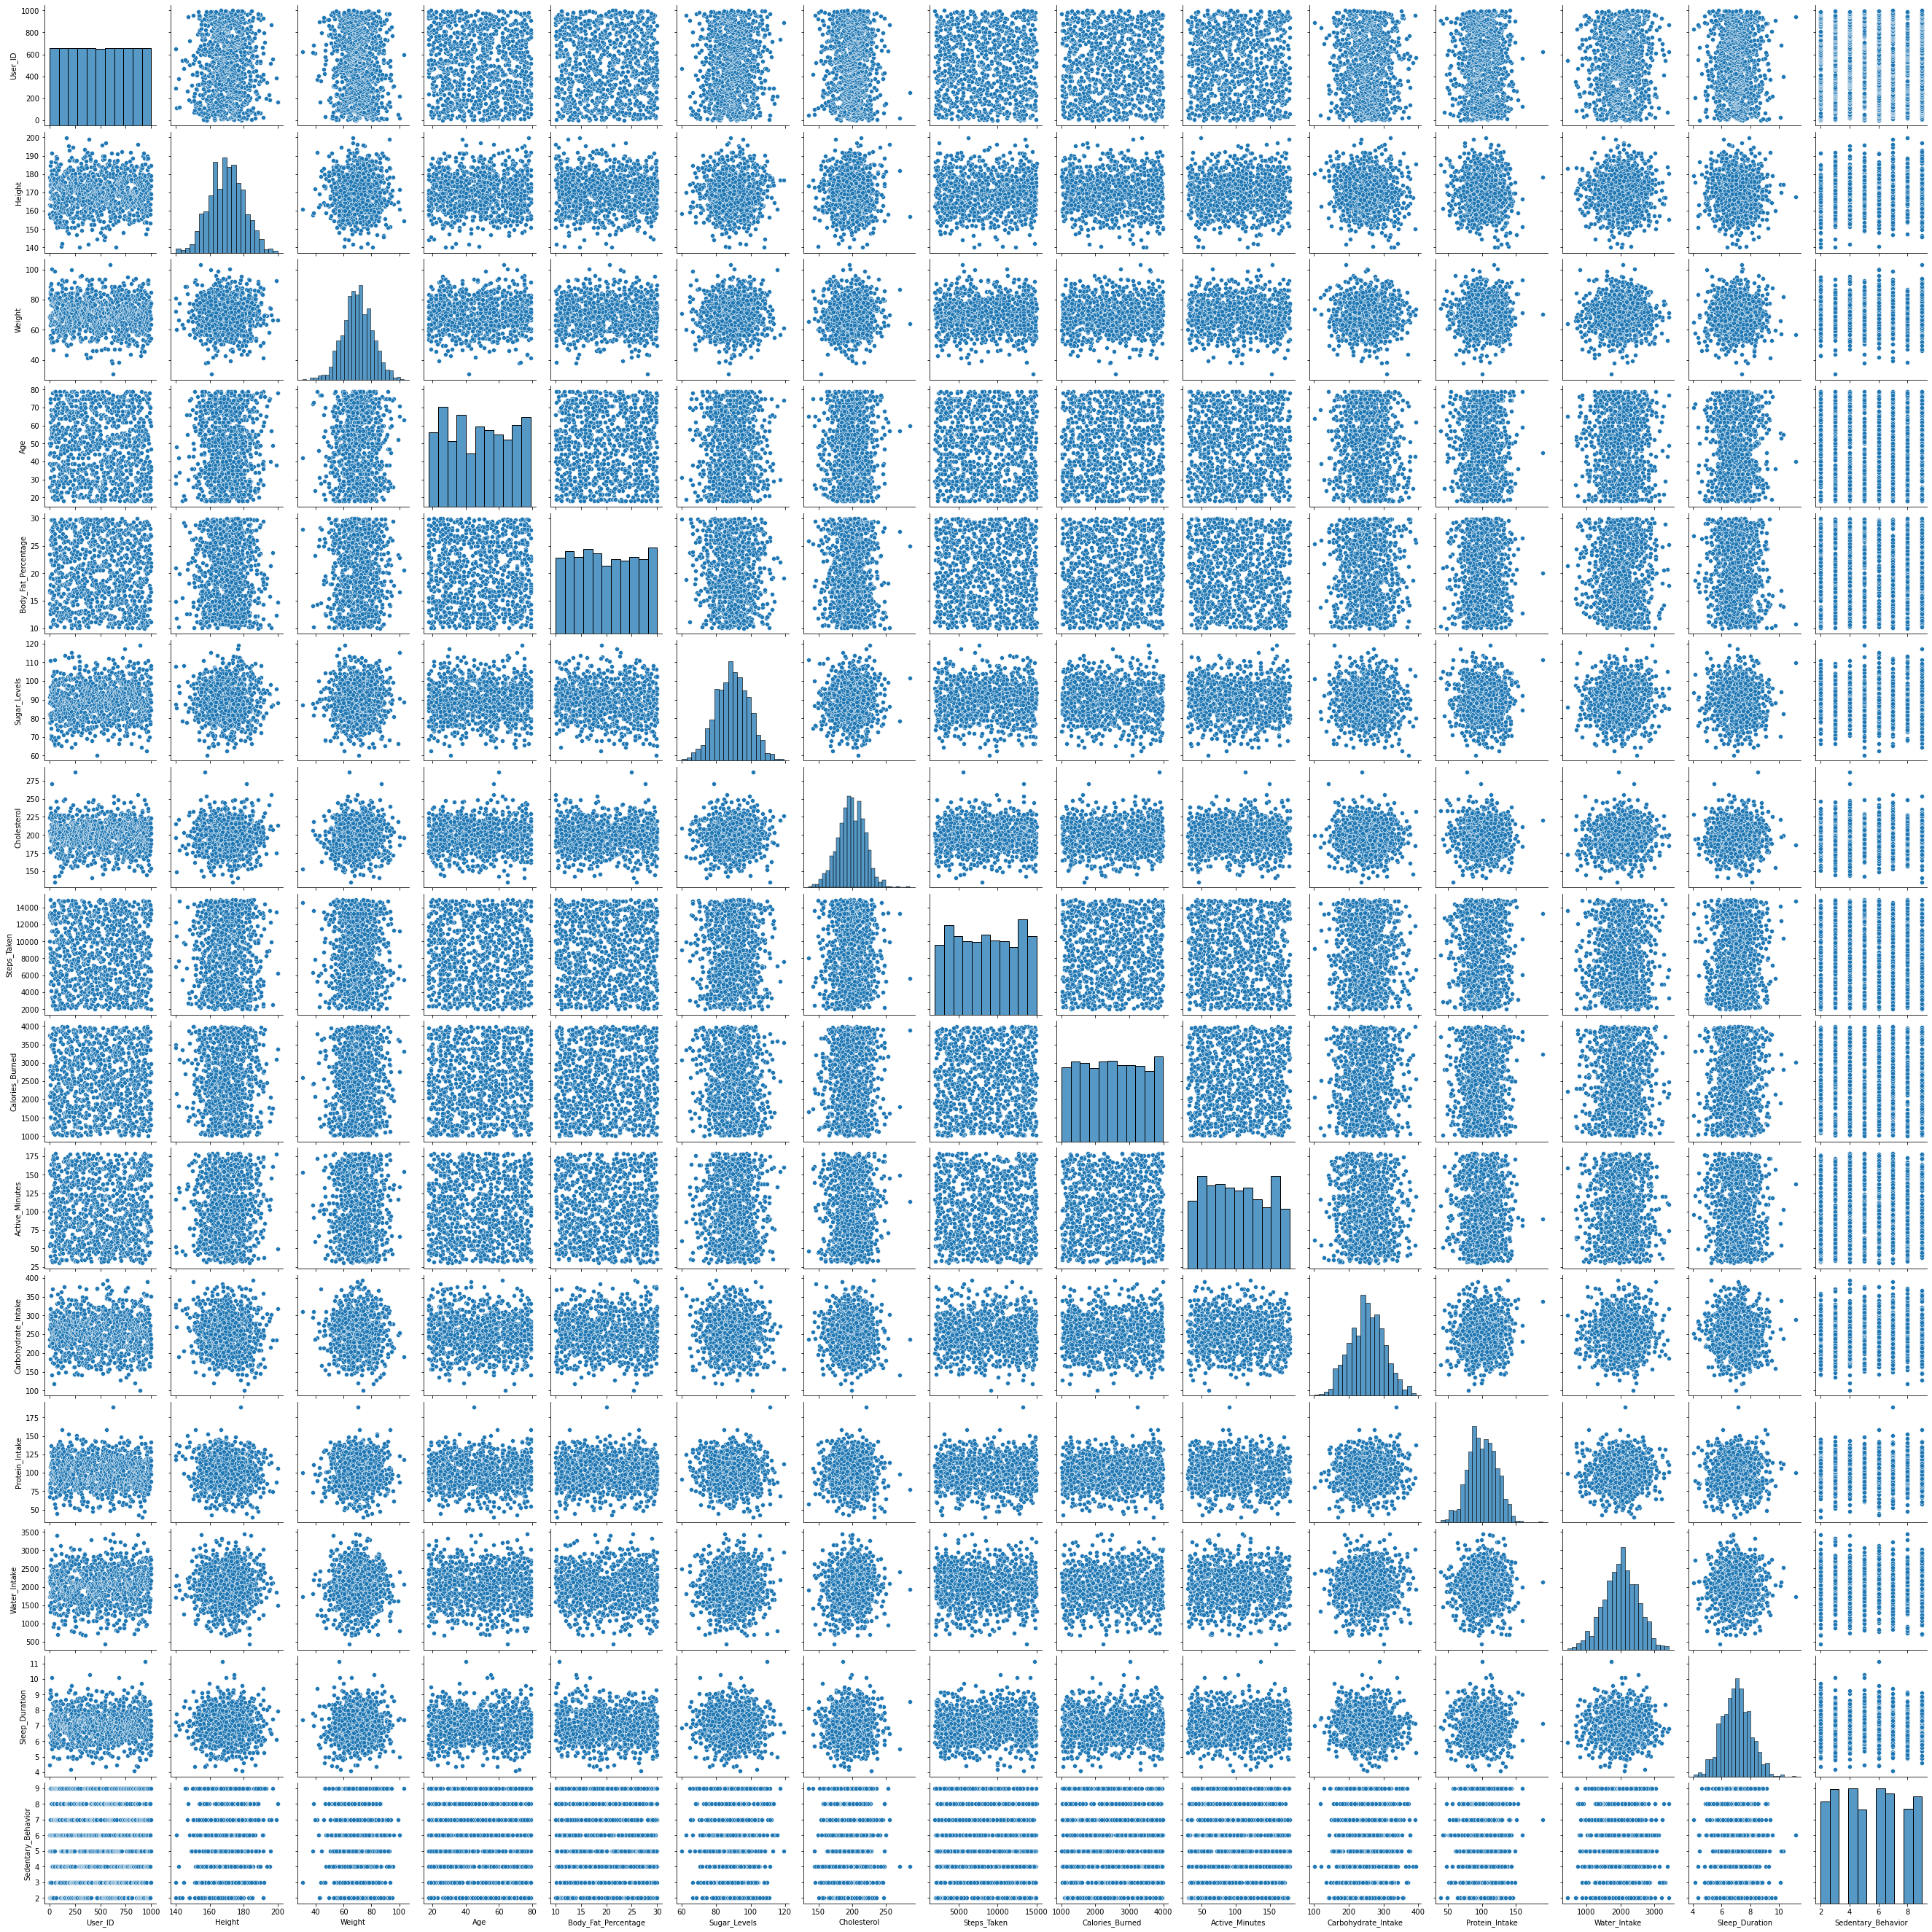

In [14]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))  
plt.show()

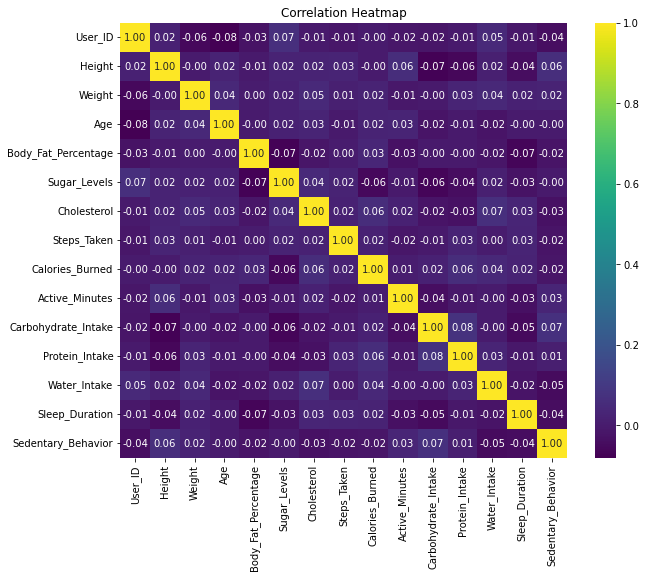

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f")  
plt.title('Correlation Heatmap')
plt.show()

In [16]:
X = df.drop(columns=['User_ID'])  # Features
Y = df['Health_Goals']  # Target variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(800, 22)

In [18]:
X_test.shape

(200, 22)

In [19]:
Y_train.shape

(800,)

In [20]:
Y_test.shape

(200,)

#### RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_clf = RandomForestClassifier(n_estimators=100, random_state=42)

bagging_clf = BaggingClassifier(base_clf, n_estimators=10, random_state=42)

bagging_clf.fit(X_train, y_train)

y_train_pred = bagging_clf.predict(X_train)
y_test_pred = bagging_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9775
Test Accuracy: 0.88


#### SUPPORT VECTOR MACHINE(SVM) WITH KERNEL TRICK

In [24]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SVM classifier with RBF kernel
svm_clf = SVC(kernel='rbf', gamma='scale', random_state=42)

svm_clf.fit(X_train, y_train)

y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.92875
Test Accuracy: 0.845


### DecisionTree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.875


#### LOGISTICREGRESSION WITH RECURSIVE FEATURE ELIMINATION(RFE)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression()

# Initialize Recursive Feature Elimination (RFE) with logistic regression as estimator
rfe = RFE(estimator=logreg, n_features_to_select=10, step=1)

rfe.fit(X_train, y_train)

selected_features = rfe.support_

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

logreg.fit(X_train_selected, y_train)

y_train_pred = logreg.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = logreg.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.88125
Test Accuracy: 0.87


#### GAUSSIAN NAIVEBAYES

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GaussianNB()

clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.85
Test Accuracy: 0.795


### KNN

In [28]:
pip install --upgrade scikit-learn threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest

X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

X_train_clean = X_train[iso_forest.predict(X_train) == 1]
y_train_clean = y_train[iso_forest.predict(X_train) == 1]

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_train_clean, y_train_clean)

y_train_pred = knn_classifier.predict(X_train_clean)
y_test_pred = knn_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train_clean, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.882202304737516
Test Accuracy: 0.81
